### Load the cleaned dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [2]:
# Load the cleaned dataset
df = pd.read_csv('diabetic_data_cleaned.csv')

# Quick overview of the dataset
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98591 entries, 0 to 98590
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               98591 non-null  int64 
 1   race                      98591 non-null  object
 2   gender                    98591 non-null  object
 3   age                       98591 non-null  object
 4   admission_type            98591 non-null  object
 5   discharge_disposition     98591 non-null  object
 6   admission_source          98591 non-null  object
 7   hospital_stay_days        98591 non-null  int64 
 8   num_lab_procedures        98591 non-null  int64 
 9   num_procedures            98591 non-null  int64 
 10  num_medications           98591 non-null  int64 
 11  number_outpatient         98591 non-null  int64 
 12  number_emergency          98591 non-null  int64 
 13  number_inpatient          98591 non-null  int64 
 14  diag_1                

,patient_nbr,race,gender,age,admission_type,discharge_disposition,admission_source,hospital_stay_days,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,num_chronic_conditions
0,55629189,Caucasian,Female,[10-20),Emergency,Home,Emergency Room,3,59,0,18,0,0,0,Other,Diabetes,Other,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,1
1,86047875,AfricanAmerican,Female,[20-30),Emergency,Home,Emergency Room,2,11,5,13,2,0,1,Other,Diabetes,Other,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,1
2,82442376,Caucasian,Male,[30-40),Emergency,Home,Emergency Room,2,44,1,16,0,0,0,Other,Diabetes,Circulatory,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,2
3,42519267,Caucasian,Male,[40-50),Emergency,Home,Emergency Room,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,3
4,82637451,Caucasian,Male,[50-60),Emergency,Home,Referral,3,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0,3


### Target Variable Distribution

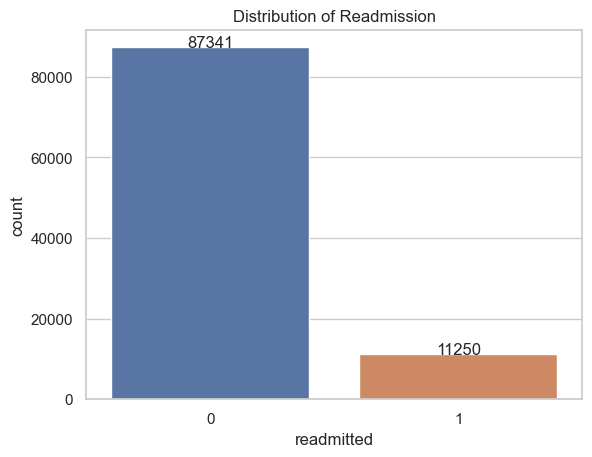

In [3]:
sns.countplot(x='readmitted', data=df)
plt.title('Distribution of Readmission')
for index, value in enumerate(df['readmitted'].value_counts()):
    plt.text(index, value, str(value), ha='center')

plt.show()

87341 "not readmitted" vs 11250 "readmitted" cases, which means the dataset is heavily imbalanced (~88% vs 12%).

### Univariate Analysis

### Numeric Distributions

<function matplotlib.pyplot.show(close=None, block=None)>

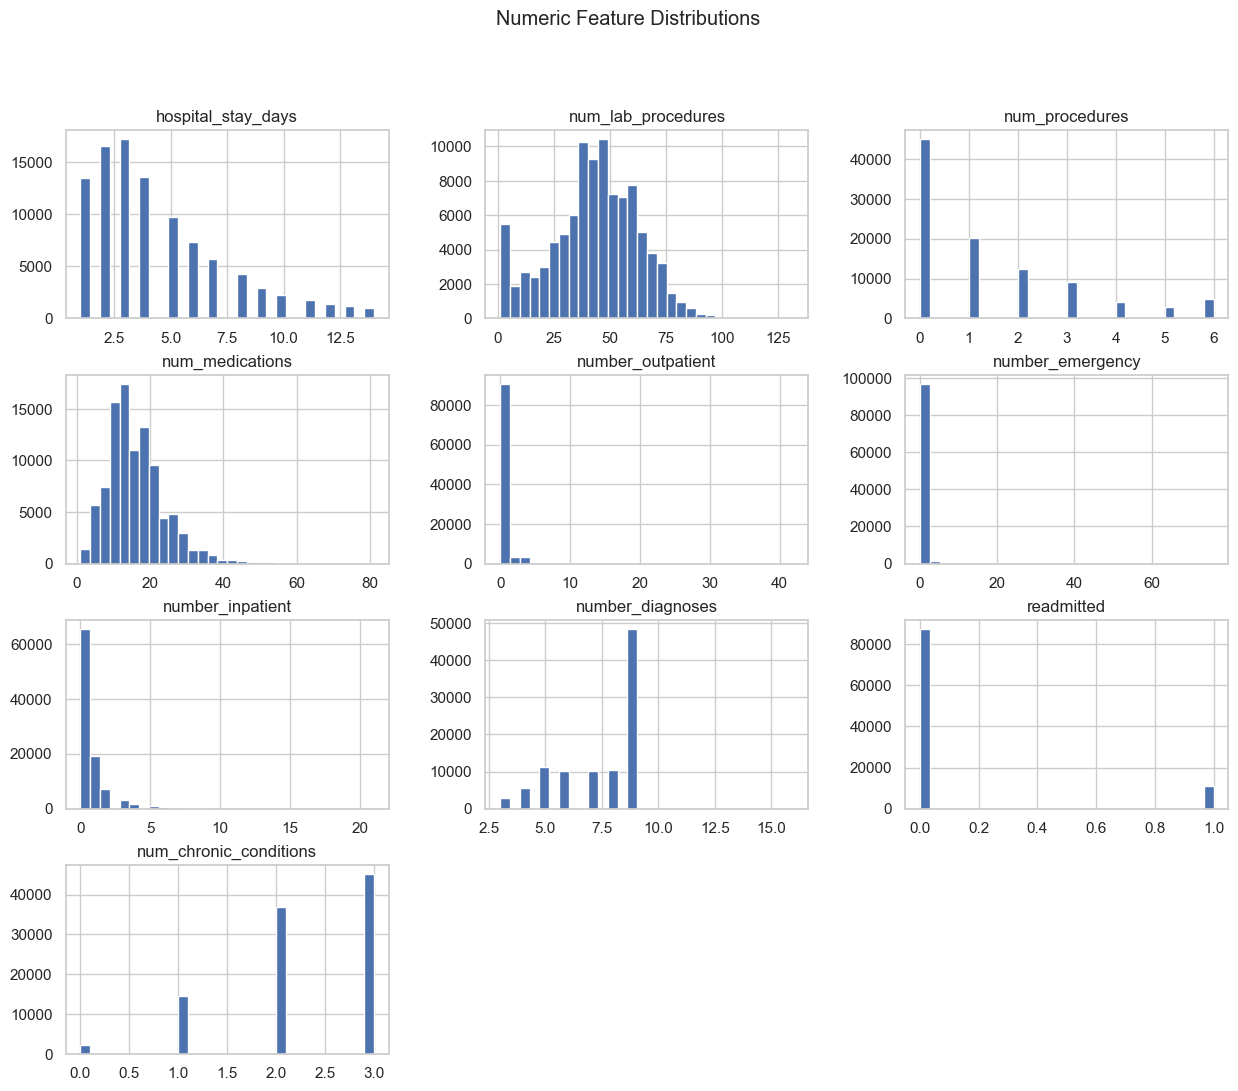

In [4]:
# Exclude 'patient_nbr' from numeric analysis
df.drop(columns=['patient_nbr']).hist(figsize=(15, 12), bins=30)
plt.suptitle('Numeric Feature Distributions')
plt.show

### Counts of Categorical Variables

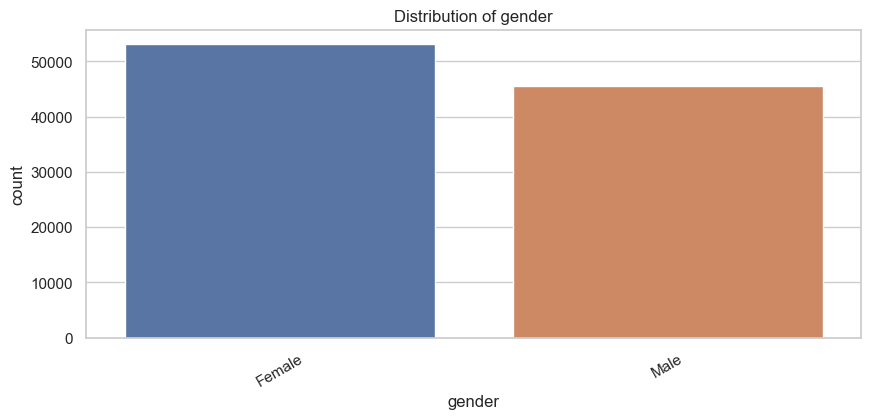

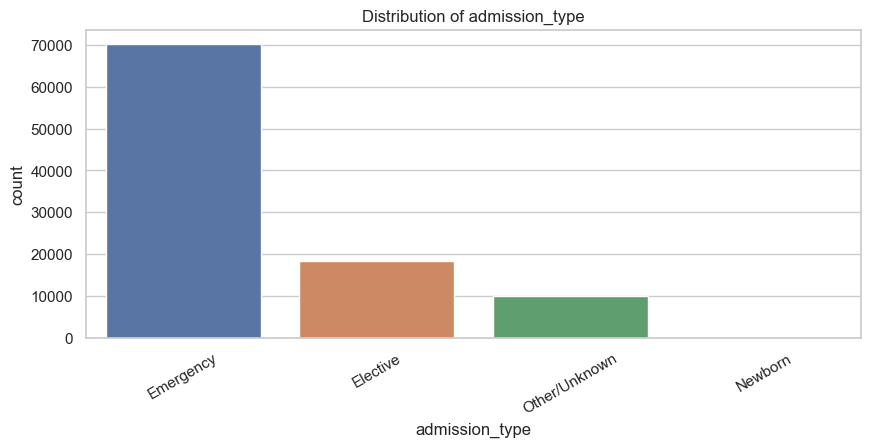

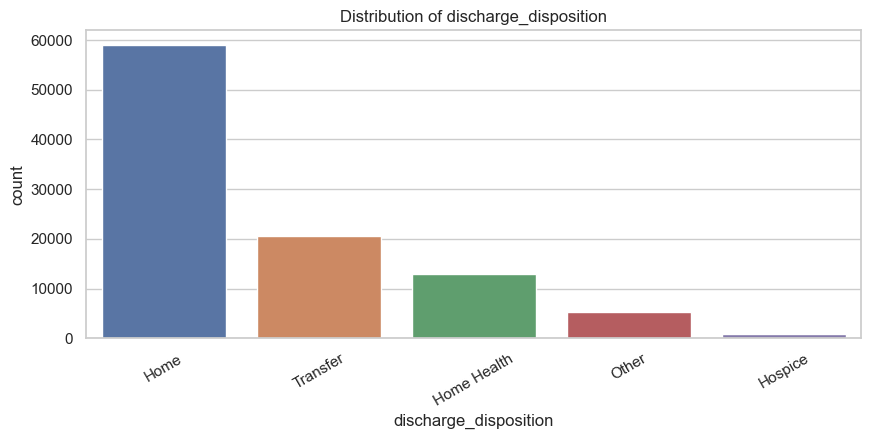

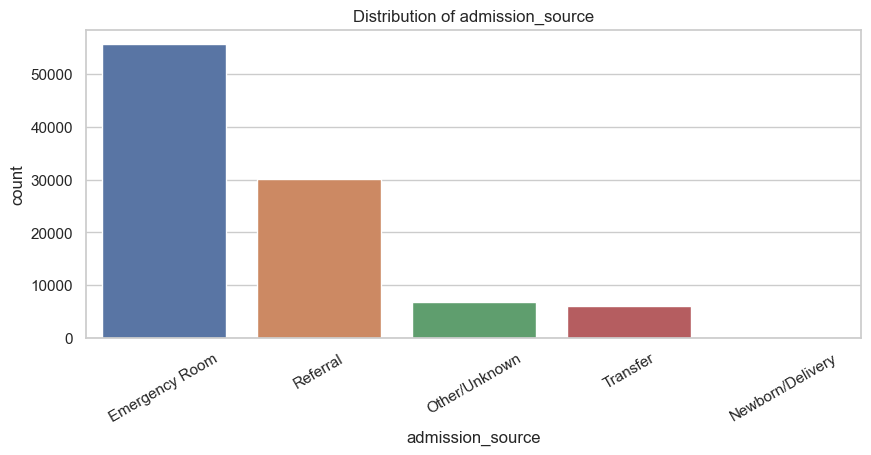

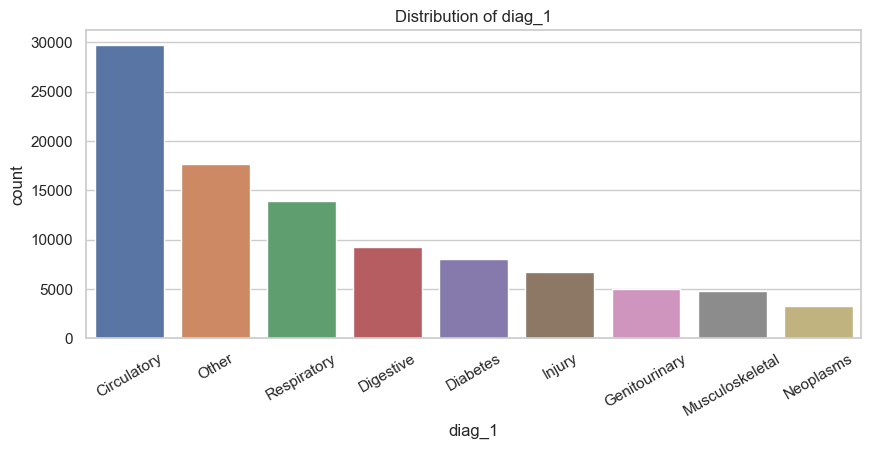

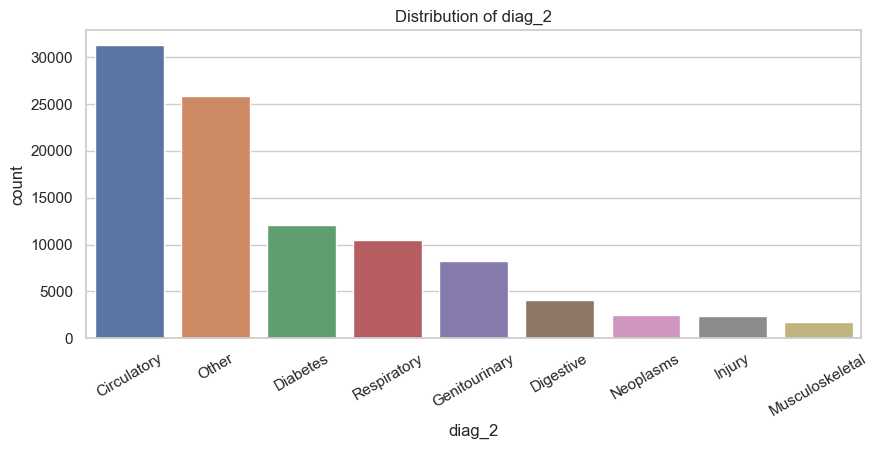

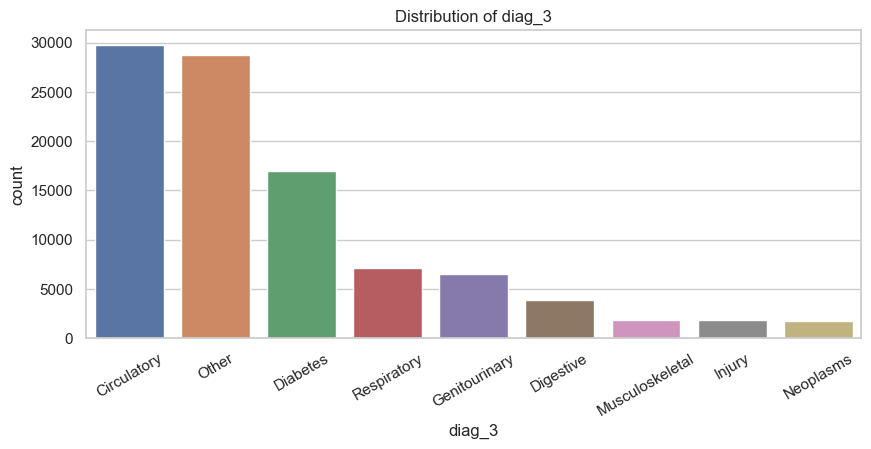

In [5]:
# Display counts of categorical variables
categorical_cols = df[['gender', 'admission_type', 'discharge_disposition', 'admission_source', 'diag_1', 'diag_2', 'diag_3']].columns

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=30)
    plt.title(f'Distribution of {col}')
    plt.show()

### Bivariate Analysis

### Age vs Readmission

In [6]:
# Convert to string/categorical
df["age"] = df["age"].astype(str)
df["readmitted"] = df["readmitted"].astype(str)

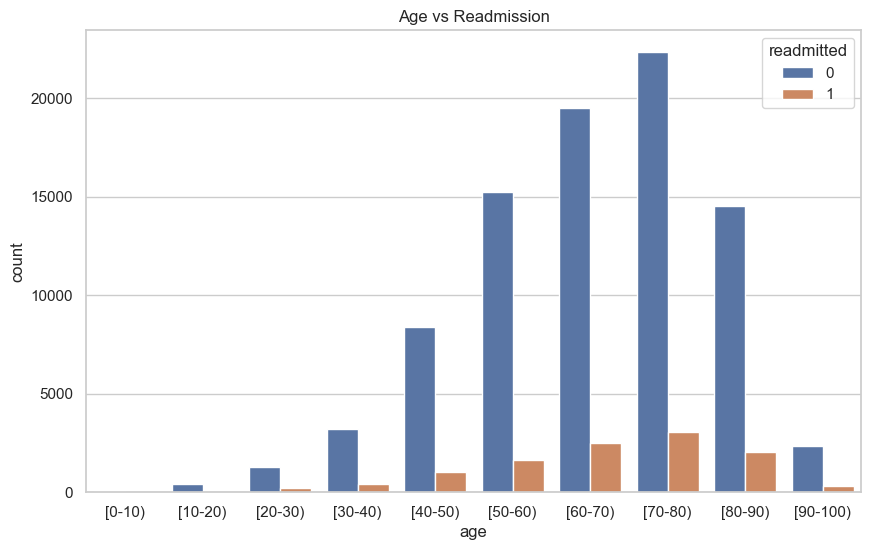

In [7]:
# Relationship between age and readmission
plt.figure(figsize=(10, 6))
sns.countplot(x='age',hue='readmitted', data=df, order=sorted(df['age'].unique()))
plt.title('Age vs Readmission')
plt.show()

In [8]:
# Convert 'readmitted' back to numeric 
df["readmitted"] = df["readmitted"].astype('int64')

### Boxplot of Numeric Features vs Readmission

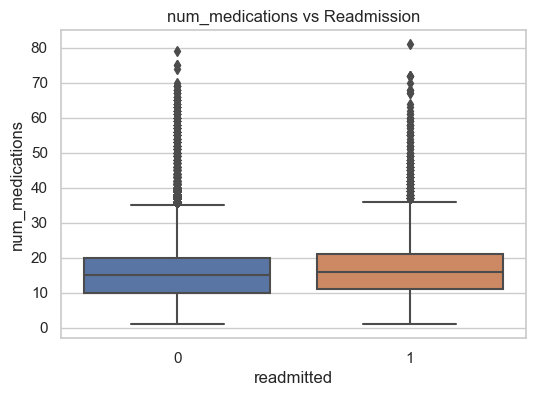

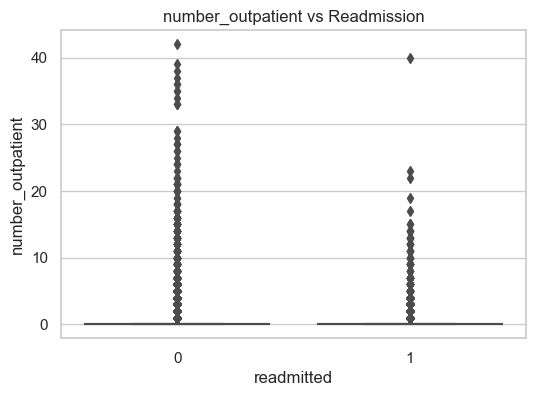

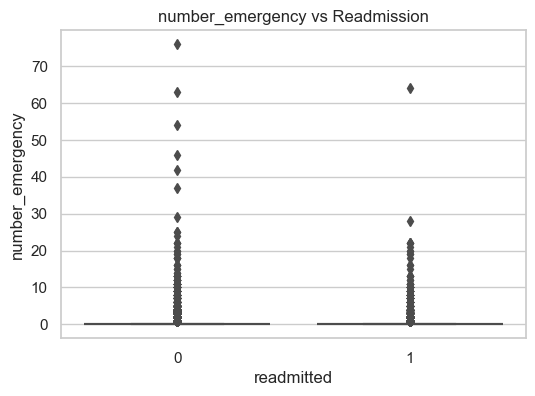

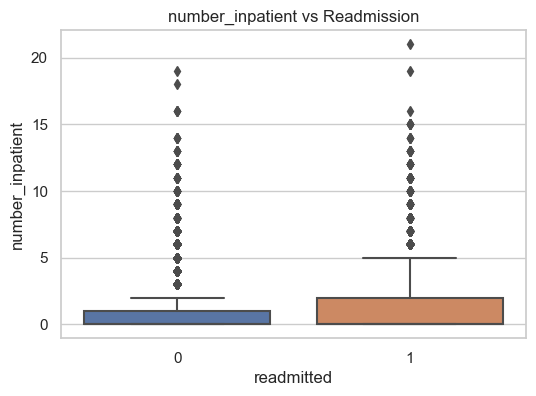

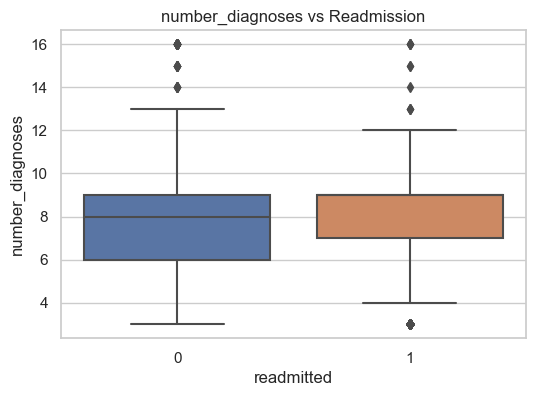

In [9]:
# Boxplot of Numeric Features vs Readmission
numeric_cols = ['num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="readmitted", y=col, data=df)
    plt.title(f"{col} vs Readmission")
    plt.show()

### Check Correlations

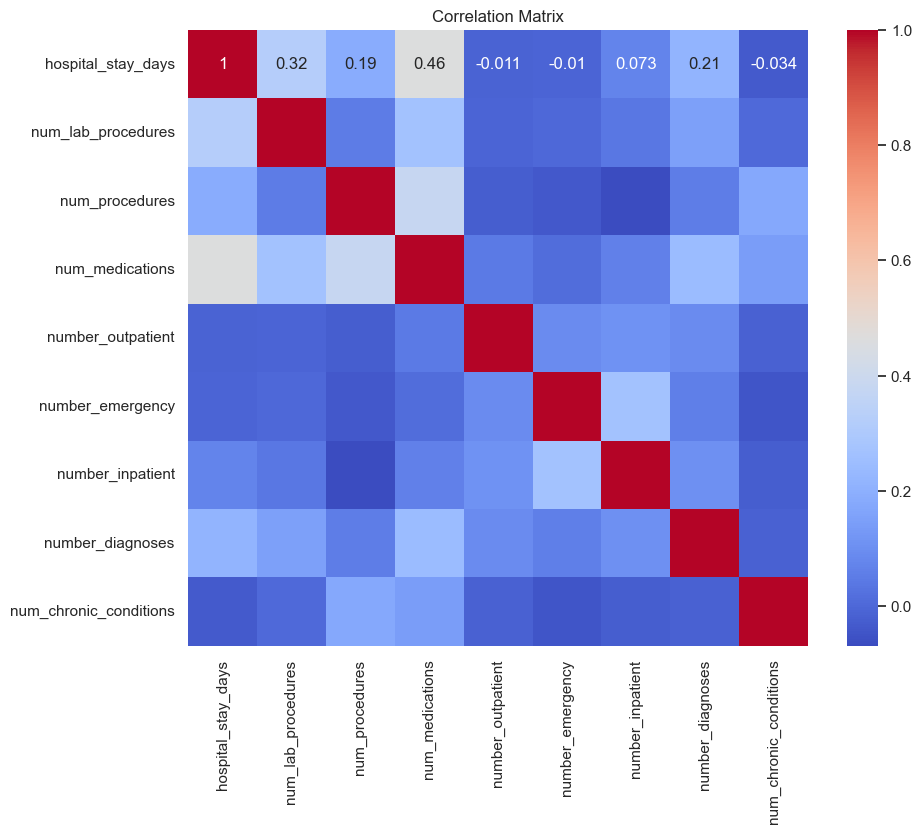

In [10]:
# Select numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['patient_nbr', 'readmitted'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Strong Correlations**

- num_medications ↔ hospital_stay_days (0.46)
The longer a patient stays, the more medications they receive.

- num_lab_procedures ↔ hospital_stay_days (0.32)
Longer stays suggest more labs ordered.

- num_procedures ↔ hospital_stay_days (0.19)
Indicates hospital stays are tied to clinical complexity.

**Moderate Relationships**

- number_inpatient ↔ hospital_stay_days (0.21)
More inpatient visits show associations with longer hospital stays.

- number_diagnoses ↔ hospital_stay_days (0.073)
More diagnoses slightly linked to longer stays.

In [11]:
variables_to_check = ['number_inpatient', 'number_emergency', 'number_outpatient', 'number_diagnoses', 'hospital_stay_days', 'num_medications', 'num_lab_procedures', 'num_procedures', 'num_chronic_conditions']

variables = df[variables_to_check]
vif_df = pd.DataFrame()
vif_df["Variable"] = variables.columns
vif_df["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(len(variables.columns))]

# Show VIF results
print(vif_df)

                 Variable        VIF
0        number_inpatient   1.387498
1        number_emergency   1.134597
2       number_outpatient   1.115642
3        number_diagnoses  10.516820
4      hospital_stay_days   4.400244
5         num_medications   7.622908
6      num_lab_procedures   6.195727
7          num_procedures   1.954030
8  num_chronic_conditions   6.991961


Variance Inflation Factor (VIF) is a statistical measure that indicates the extent to which the variance of a regression coefficient is "inflated" or increased due to multicollinearity—the correlation between independent variables in a multiple regression model. A high VIF means a predictor variable is highly correlated with other predictors.

**Very high VIF (>10):**

number_diagnoses (10.5) → strongly collinear with one or more features (likely num_chronic_conditions).

**Moderate VIF (5–10):**

num_medications (7.6), num_lab_procedures (6.2), num_chronic_conditions (7.0).

These are likely correlated with hospital_stay_days (longer stays → more meds, more labs, more chronic conditions coded).

**Safe features (<5):**

number_inpatient, number_emergency, number_outpatient, num_procedures, hospital_stay_days (though hospital_stay_days is borderline).

### Chi-Square Test

In [12]:
# Chi-Square Test for categorical features vs readmission

def chi_square_test(df, feature, target="readmitted"):
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Example usage
for col in ["age", "race", "gender", "admission_type", "discharge_disposition", "admission_source"]:
    chi2, p = chi_square_test(df, col, target="readmitted")
    print(f"{col}: chi2={chi2:.2f}, p={p:.4f}")


age: chi2=101.48, p=0.0000
race: chi2=23.98, p=0.0001
gender: chi2=0.47, p=0.4930
admission_type: chi2=23.32, p=0.0000
discharge_disposition: chi2=795.30, p=0.0000
admission_source: chi2=43.84, p=0.0000


📌 Age, admission_type, discharge_disposition, and admission_source show statistically significant association with readmission. 